# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

from Simple_Linear.model import LinearRegression
from Multivarate_Linear.model import MultipleLinearRegression

# Tiền xử lý

In [2]:
pumpkins = pd.read_csv('E:/VSCode/Python/Mechine_Learning/Regression/Data/US-pumpkins.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


In [3]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.00,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.00,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.00,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.00,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.00,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [4]:
columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)

C:\Users\tranl\AppData\Local\Temp\ipykernel_8392\3876088253.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year, 1, 1)).days)


In [6]:
new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})
new_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...,...,...,...
1738,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,15.000
1739,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,14.375
1740,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,12.875
1741,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,12.000


In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
...,...,...,...,...,...,...,...,...
1738,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.000000
1739,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.750000
1740,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.750000
1741,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.000000


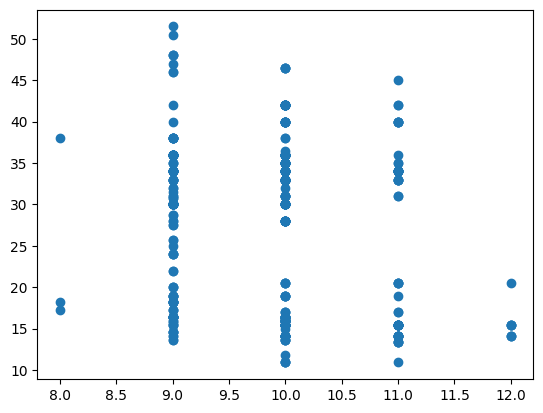

In [8]:
plt.scatter('Month','Price',data=new_pumpkins)

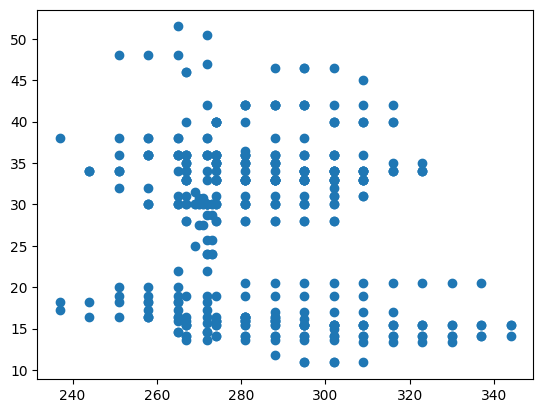

In [9]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [10]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077526
-0.1667332249274541


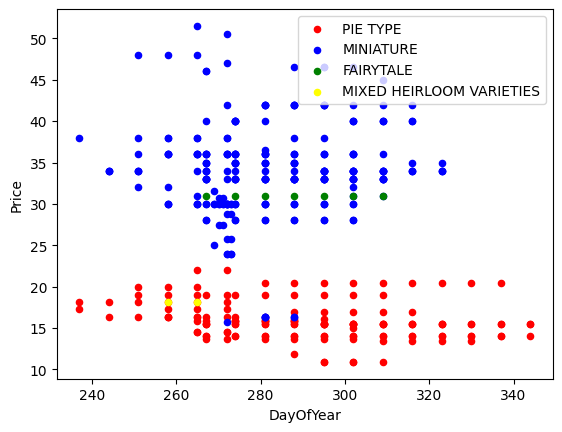

In [11]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

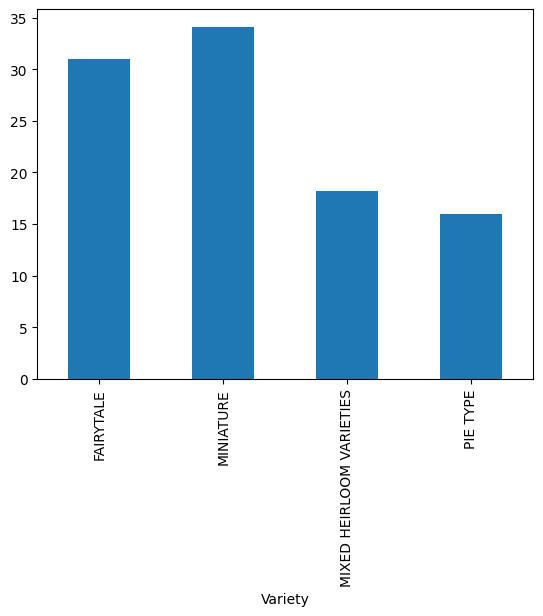

In [12]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='DayOfYear', ylabel='Price'>

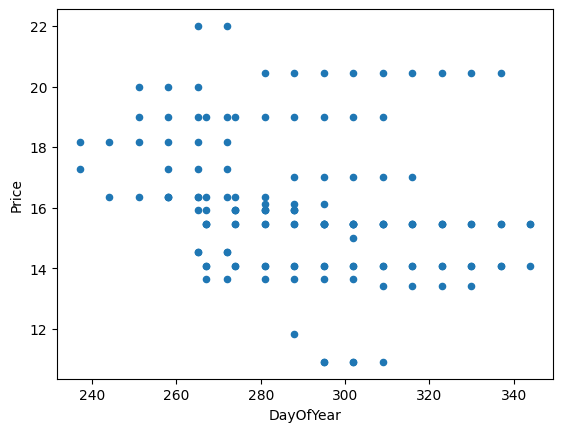

In [13]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

In [14]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\tranl\AppData\Local\Temp\ipykernel_8392\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


# Simple Linear

In [19]:
x = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
model = LinearRegression(learning_rate=0.01)

In [23]:
model.fit(X_train, y_train.values)

In [24]:
pred = model.predict(X_test)

Do pred được dự đoán có dạng 2d mà y_test có dạng 1d

In [25]:
print(model.mean_squared_error(y_test, pred.reshape(-1)))

7.6665709078355855


In [71]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 4.02e+02 (3.41e+02%)


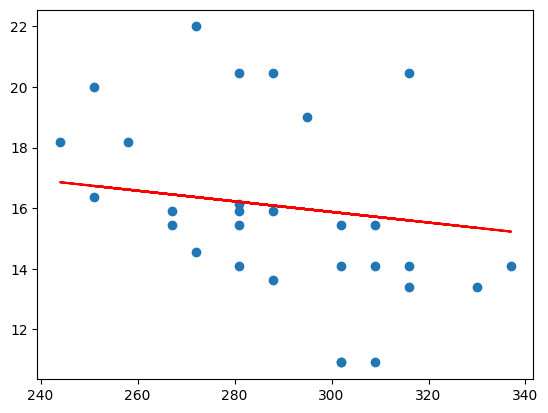

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, color='red')

# Multuvariate Linear Regression

In [119]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

In [120]:
def convert_bool_to_int(value):
    if isinstance(value, bool):
        return int(value)
    return value

X = X.applymap(convert_bool_to_int)
X

C:\Users\tranl\AppData\Local\Temp\ipykernel_8392\3828049034.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(convert_bool_to_int)


,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE,Month,ATLANTA,BALTIMORE,BOSTON,CHICAGO,COLUMBIA,DETROIT,NEW YORK,PHILADELPHIA,SAN FRANCISCO,ST. LOUIS,1 1/9 bushel cartons,1 1/9 bushel crates,1/2 bushel cartons,bushel baskets,bushel cartons
70,0,0,0,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
71,0,0,0,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
72,0,0,0,1,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
73,0,0,0,1,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
74,0,0,0,1,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,0,1,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1739,0,1,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1740,0,1,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1741,0,1,0,0,9,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
model = MultipleLinearRegression()

In [141]:
model.fit(X_train, y_train)

In [142]:
pred = model.predict(X_test)

In [129]:
mse = model.mean_squared_error(y_test.values, pred)
mse

np.float64(163188.14634928224)

In [143]:
mse = np.sqrt(mean_squared_error(y_test,pred))
mse

np.float64(402.08799730919213)

# Logistic Regression


In [146]:
full_pumpkins = pd.read_csv('E:/VSCode/Python/Mechine_Learning/Regression/Data/US-pumpkins.csv')

In [147]:

columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

pumpkins.dropna(inplace=True)

In [148]:
pumpkins.info

<bound method DataFrame.info of       City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]>

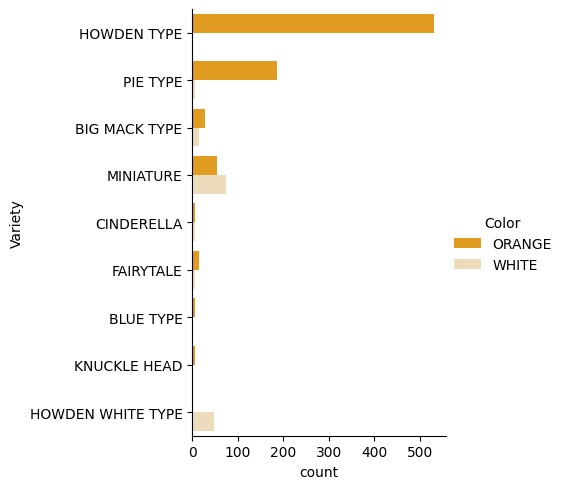

In [150]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}

sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",
palette=palette, 
)

In [151]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [152]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [153]:
from sklearn.compose import ColumnTransformer
    
ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
        ])
    
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [154]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [158]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

C:\Users\tranl\AppData\Local\Temp\ipykernel_8392\4185716423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


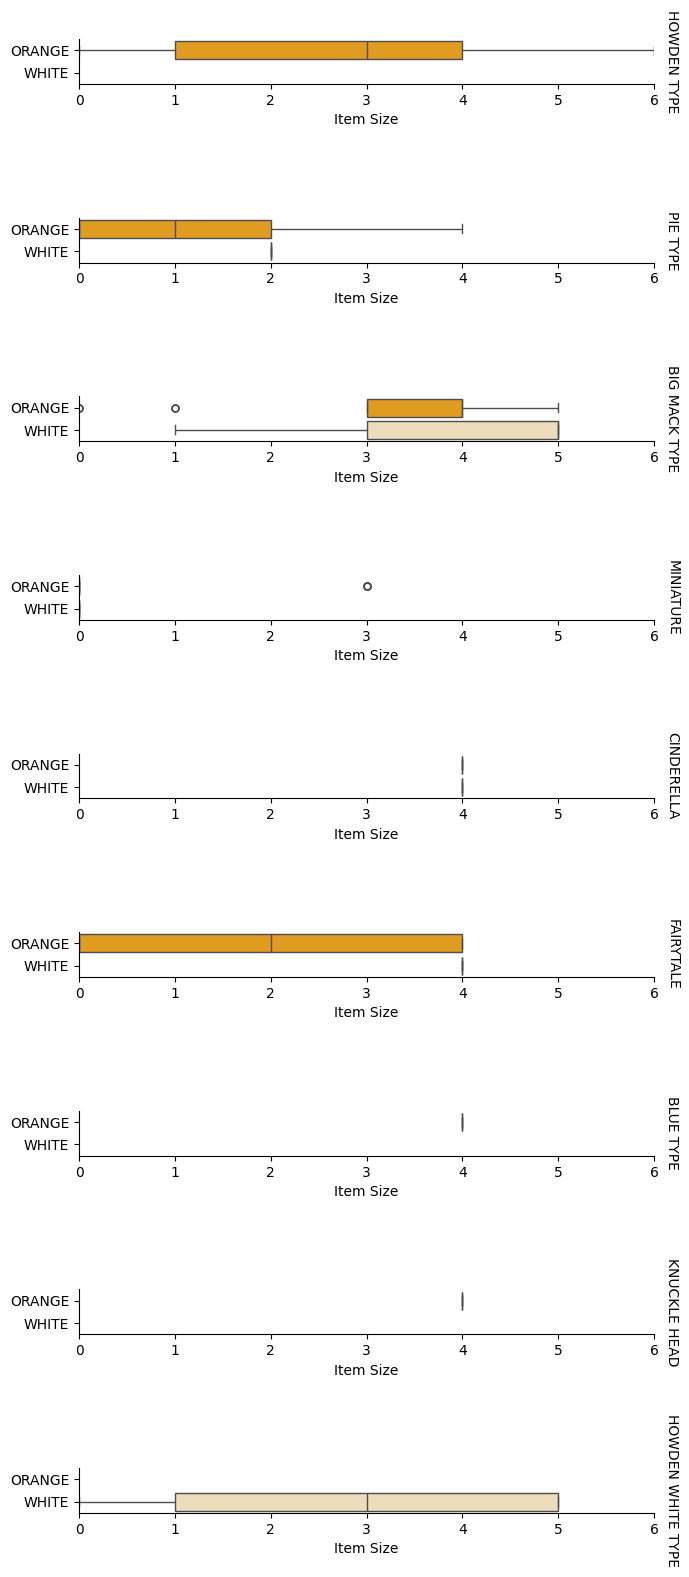

In [159]:
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
    }
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

g = sns.catplot(
        data=pumpkins,
        x="Item Size", y="Color", row='Variety',
        kind="box", orient="h",
        sharex=False, margin_titles=True,
        height=1.8, aspect=4, palette=palette,
    )
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

C:\Users\tranl\AppData\Local\Temp\ipykernel_8392\2118292014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)


ValueError: The palette dictionary is missing keys: {'1', '0'}

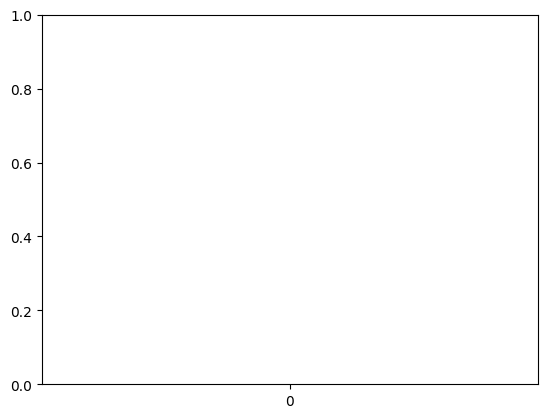

In [160]:
palette = {
0: 'orange',
1: 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)